<a href="https://colab.research.google.com/github/Anjasfedo/eceg-lsb-lzw-huffman/blob/main/LSB_ECEG/lsb_eceg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KTP Faker

In [ ]:
  !pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.2 MB/s eta 0:00:00


In [ ]:
from faker import Faker
import random

class DummyKTPGenerator:
    def __init__(self):
        self.faker = Faker('id_ID')  # Use Indonesian locale
        self.indonesian_jobs = [
            "Guru", "Dokter", "Petani", "Nelayan", "Pegawai Negeri", "Karyawan Swasta",
            "Wiraswasta", "Mahasiswa", "Pelajar", "Pengacara", "Arsitek", "Insinyur",
            "Pedagang", "Polisi", "Tentara", "Seniman", "Penulis", "Pilot", "Supir",
            "Teknisi", "Pemadam Kebakaran", "Apoteker"
        ]

    def generate_ktp(self):
        """Generate a single dummy KTP record."""
        nik = self.generate_nik()
        name = self.faker.name()
        birth_place = self.faker.city()
        birth_date = self.faker.date_of_birth().strftime('%d-%m-%Y')
        gender = random.choice(['Laki-Laki', 'Perempuan'])
        blood_type = random.choice(['A', 'B', 'AB', 'O'])
        address = self.faker.address().replace('\n', ', ')
        rt_rw = f"{random.randint(1, 20)}/{random.randint(1, 20)}"
        kelurahan = self.faker.city_suffix()
        religion = random.choice(['Islam', 'Kristen', 'Katolik', 'Hindu', 'Buddha', 'Konghucu'])
        marital_status = random.choice(['Belum Kawin', 'Kawin', 'Cerai Hidup', 'Cerai Mati'])
        occupation = random.choice(self.indonesian_jobs)  # Select random Indonesian job
        nationality = 'WNI'  # Assuming all generated data is Indonesian
        valid_until = 'SEUMUR HIDUP'

        return {
            'NIK': nik,
            'Nama': name,
            'Tempat/Tgl Lahir': f"{birth_place}, {birth_date}",
            'Jenis Kelamin': gender,
            'Gol Darah': blood_type,
            'Alamat': address,
            'RT/RW': rt_rw,
            'Kel/Desa': kelurahan,
            'Agama': religion,
            'Status Perkawinan': marital_status,
            'Pekerjaan': occupation,
            'Kewarganegaraan': nationality,
            'Berlaku Hingga': valid_until,
        }

    def generate_nik(self):
        """Generate a dummy NIK (Indonesian identity number)."""
        province_code = random.randint(10, 34)  # Random province code
        regency_code = random.randint(1, 99)   # Random regency code
        district_code = random.randint(1, 99) # Random district code
        date_of_birth = self.faker.date_of_birth()
        birth_date_part = date_of_birth.strftime('%d%m%y')  # Format DDMMYY
        random_sequence = random.randint(1000, 9999)       # Random sequence number
        return f"{province_code:02}{regency_code:02}{district_code:02}{birth_date_part}{random_sequence:04}"

    def generate_multiple_ktps(self, count=1):
        """Generate multiple dummy KTP records."""
        return [self.generate_ktp() for _ in range(count)]

    @staticmethod
    def merge_ktp_data(ktp):
        """
        Merge a single KTP dictionary into a formatted string with '#' as a separator.
        Replace spaces with '%'.
        """
        fields = [
            ktp.get('NIK', ''),
            ktp.get('Nama', ''),
            ktp.get('Tempat/Tgl Lahir', ''),
            ktp.get('Jenis Kelamin', ''),
            ktp.get('Gol Darah', ''),
            ktp.get('Alamat', ''),
            ktp.get('RT/RW', ''),
            ktp.get('Kel/Desa', ''),
            ktp.get('Agama', ''),
            ktp.get('Status Perkawinan', ''),
            ktp.get('Pekerjaan', ''),
            ktp.get('Kewarganegaraan', ''),
            ktp.get('Berlaku Hingga', '')
        ]
        merged = '#'.join(fields)
        return merged.replace(' ', '%')

    @staticmethod
    def merge_multiple_ktps(ktps):
        """
        Merge multiple KTP dictionaries into formatted strings with '#' as a separator.
        Replace spaces with '%'.
        """
        return [DummyKTPGenerator.merge_ktp_data(ktp) for ktp in ktps]


In [ ]:
generator = DummyKTPGenerator()

# Generate multiple dummy KTPs
dummy_ktps = generator.generate_multiple_ktps(count=5)

# Merge single KTP
merged_ktp = generator.merge_ktp_data(dummy_ktps[0])
print("Merged Single KTP:", merged_ktp)

# Merge multiple KTPs
merged_ktps = generator.merge_multiple_ktps(dummy_ktps)
print("Merged Multiple KTPs:")
for m_ktp in merged_ktps:
    print(m_ktp)

Merged Single KTP: 3383590907177850#R.%Uli%Hardiansyah,%S.Kom#Batu,%13-07-1913#Perempuan#AB#Gang%Ciumbuleuit%No.%78,%Metro,%Maluku%Utara%32671#15/16#Ville#Konghucu#Cerai%Hidup#Dokter#WNI#SEUMUR%HIDUP
Merged Multiple KTPs:
3383590907177850#R.%Uli%Hardiansyah,%S.Kom#Batu,%13-07-1913#Perempuan#AB#Gang%Ciumbuleuit%No.%78,%Metro,%Maluku%Utara%32671#15/16#Ville#Konghucu#Cerai%Hidup#Dokter#WNI#SEUMUR%HIDUP
2462361111889140#Farhunnisa%Susanti#Tangerang%Selatan,%02-09-1959#Perempuan#B#Jl.%Yos%Sudarso%No.%70,%Salatiga,%MU%15492#10/16#Ville#Hindu#Kawin#Teknisi#WNI#SEUMUR%HIDUP
2057721411969919#Radit%Saragih#Bengkulu,%02-03-2023#Perempuan#O#Gang%Cikutra%Barat%No.%325,%Serang,%MA%56099#9/6#Ville#Buddha#Cerai%Hidup#Pedagang#WNI#SEUMUR%HIDUP
1566510806501442#Rika%Agustina#Banjarbaru,%15-05-1963#Laki-Laki#O#Gang%M.T%Haryono%No.%1,%Sorong,%Sulawesi%Tenggara%95205#9/1#Ville#Islam#Belum%Kawin#Pengacara#WNI#SEUMUR%HIDUP
1574410503313679#H.%Ridwan%Sirait,%M.Pd#Pasuruan,%15-02-2024#Perempuan#O#Jl.%Merdeka%N

In [ ]:
merged_ktps[0]

'3383590907177850#R.%Uli%Hardiansyah,%S.Kom#Batu,%13-07-1913#Perempuan#AB#Gang%Ciumbuleuit%No.%78,%Metro,%Maluku%Utara%32671#15/16#Ville#Konghucu#Cerai%Hidup#Dokter#WNI#SEUMUR%HIDUP'

In [ ]:
# Repeat the content to match or exceed 98304 characters
repeated_data = (merged_ktps[0] * (98304 // len(merged_ktps[0]) + 1))[:98304]  # Truncate to exactly 98304 characters

# Verify length
print(len(repeated_data))  # Output: 98304

98304


# Cover Image

In [ ]:
import requests
from PIL import Image
import io
import numpy as np

# URL to the raw image file
url = "https://raw.githubusercontent.com/mikolalysenko/lena/master/lena.png"

# Download the image
response = requests.get(url)
if response.status_code == 200:
    # Load the image using PIL
    lena_image = Image.open(io.BytesIO(response.content))
    lena_image.show()  # Display the image (optional)
    lena_image.save("lena.png")  # Save the image locally
else:
    print("Failed to download the image.")

In [ ]:
import os
LENA_IMG = 'lena.png'

if not os.path.exists(LENA_IMG):
    raise FileNotFoundError(f"Image not found at {LENA_IMG}")

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]], dtype=uint8)
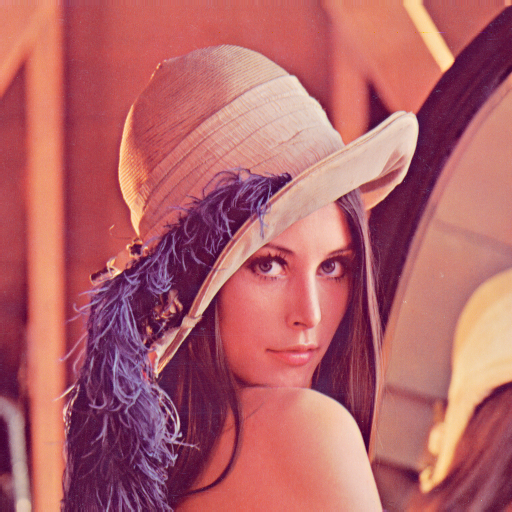

In [ ]:
image_lena = Image.open(LENA_IMG)

image_lena_data = np.array(image_lena)
image_lena_data

# Stego Metrics

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as skimage_ssim


class StegoMetrics:
    def __init__(self, ori_image):
        """
        Initialize the StegoMetrics class with the original image path.

        Args:
            ori_image (str): Path to the original image.
        """
        self.ori_image = ori_image

    @staticmethod
    def calculate_mse(original, stego):
        """
        Calculate the Mean Squared Error (MSE) between two images.

        Args:
            original (numpy.ndarray): Original image array.
            stego (numpy.ndarray): Stego image array.

        Returns:
            float: The MSE value.
        """
        return np.mean((original - stego) ** 2)

    def calculate_psnr(self, stego_image_path):
        """
        Calculate the Peak Signal-to-Noise Ratio (PSNR) between the original and stego image.

        Args:
            stego_image_path (str): Path to the stego image.

        Returns:
            float: The PSNR value.
        """
        # Read images
        original = cv2.imread(self.ori_image)
        stego = cv2.imread(stego_image_path)

        if original is None:
            raise ValueError(f"Failed to load original image from {self.ori_image}. Ensure the file exists and is a valid image format.")
        if stego is None:
            raise ValueError(f"Failed to load stego image from {stego_image_path}. Ensure the file exists and is a valid image format.")

        # Calculate MSE
        mse = self.calculate_mse(original, stego)
        if mse == 0:  # If images are identical
            return float('inf')

        # Calculate PSNR
        max_pixel_value = 255.0
        psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
        return psnr

    @staticmethod
    def calculate_ssim(original, stego):
        """
        Calculate the Structural Similarity Index (SSIM) between two images.

        Args:
            original (numpy.ndarray): Original image array.
            stego (numpy.ndarray): Stego image array.

        Returns:
            float: The SSIM value.
        """
        original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
        stego_gray = cv2.cvtColor(stego, cv2.COLOR_BGR2GRAY)

        ssim_value, _ = skimage_ssim(original_gray, stego_gray, full=True)
        return ssim_value


    def calculate_metrics(self, stego_image_path):
        """
        Calculate MSE, PSNR, and SSIM between the original and stego image.

        Args:
            stego_image_path (str): Path to the stego image.

        Returns:
            tuple: MSE, PSNR, and SSIM values.
        """
        # Read images
        original = cv2.imread(self.ori_image)
        stego = cv2.imread(stego_image_path)

        if original is None:
            raise ValueError(f"Failed to load original image from {self.ori_image}. Ensure the file exists and is a valid image format.")
        if stego is None:
            raise ValueError(f"Failed to load stego image from {stego_image_path}. Ensure the file exists and is a valid image format.")

        # Calculate metrics
        mse_value = self.calculate_mse(original, stego)
        psnr_value = self.calculate_psnr(stego_image_path)
        ssim_value = self.calculate_ssim(original, stego)

        print(f'Metrics between original ({self.ori_image}) and stego image ({stego_image_path}):')
        print(f'MSE: {mse_value}')
        print(f'PSNR: {psnr_value}')
        print(f'SSIM: {ssim_value}')

        return mse_value, psnr_value, ssim_value


In [ ]:
original_image_path = 'lena.png'
stego_metrics = StegoMetrics(ori_image=original_image_path)

# ECEG

In [ ]:
import random

class Point:
    def __init__(self, x=None, y=None):
        self.x = x
        self.y = y

    def is_infinity(self):
        """Check if the point is the point at infinity."""
        return self.x is None and self.y is None

    def __eq__(self, other):
        """Custom equality check for Point objects."""
        if isinstance(other, Point):
            return self.x == other.x and self.y == other.y
        return False

    def __hash__(self):
        """Make Point hashable by defining a unique hash."""
        return hash((self.x, self.y))

    def __repr__(self):
        if self.is_infinity():
            return "Point at Infinity"
        return f"Point({self.x}, {self.y})"

class ECEG:
  def __init__(self):
    self.a = 6
    self.b = 7
    self.p = 61
    self.base_point = self.generate_random_valid_point()

    self.characters = [
        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
        'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
        'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
        'y', 'z', '0', '1', '2', '3', '4', '5',
        '6', '7', '8', '9', ',', '.', '/', '?',
        ':', ';', '[', ']', '{', '}', '\\', '|',
        '‘', ' ', '!', '@', '#', '$', '%', '^',
        '&', '*', '(', ')', '-', '_', '=', '+'
    ]  # Trim the list to 63 characters


    self.valid_points = self.get_all_points()
    self.point_to_char, self.char_to_point = self.create_mappings()

  def elliptic_curve_equation(self, x):
    return (x**3 + self.a*x + self.b) % self.p

  # def is_on_curve(self, x, y):
  #   return self.elliptic_curve_equation(x)  == (y**2) % self.p

  # def generate_random_point(self):
  #   while True:
  #     x = random.randint(1, self.p - 1)
  #     y = random.randint(1, self.p - 1)
  #     if self.is_on_curve(x, y):
  #       return Point(x, y)

  def is_on_curve(self, x, y):
        """Check if a point (x, y) lies on the curve."""
        if x is None or y is None:
            return True
        return (y**2 - (x**3 + self.a * x + self.b)) % self.p == 0

  def generate_random_valid_point(self):
        """Generate a random point that lies on the elliptic curve."""
        while True:
            x = random.randint(0, self.p - 1)  # Random x-coordinate
            y_squared = (x**3 + self.a * x + self.b) % self.p  # Compute y^2

            # Check if y_squared is a quadratic residue modulo p
            if pow(y_squared, (self.p - 1) // 2, self.p) == 1:
                # Find a valid y-coordinate
                for y in range(self.p):
                    if (y**2) % self.p == y_squared:
                        return Point(x, y)

  # def calc_point_add(self, P, Q):
  #   R = Point()  # Initialize the result point R
  #   print(P, Q)

  #   slope = ((Q.y - P.y) / (Q.x - P.x))

  #   # Calculate Rx
  #   R.x = (slope**2 - P.x - Q.x)

  #   # Calculate Ry
  #   R.y = (slope * (P.x - R.x) - P.y)

  #   return R

  def calc_point_add(self, P, Q):
    """Calculate the addition of two points P and Q on the elliptic curve."""
    R = Point()  # Initialize the result point R

    if P.is_infinity():
        return Q
    if Q.is_infinity():
        return P

    # Handle the case where P and Q are inverses
    if P.x == Q.x and (P.y != Q.y or P.y == 0):
        return Point()  # Point at infinity

    # Calculate slope
    if P.x == Q.x and P.y == Q.y:
        # Point doubling
        slope = (3 * P.x**2 + self.a) * pow(2 * P.y, -1, self.p) % self.p
    else:
        # Regular point addition
        slope = (Q.y - P.y) * pow(Q.x - P.x, -1, self.p) % self.p

    # Calculate Rx
    R.x = (slope**2 - P.x - Q.x) % self.p

    # Calculate Ry
    R.y = (slope * (P.x - R.x) - P.y) % self.p

    return R

  def calc_point_doubling(self, P):
      """Calculate the point doubling 2P = P + P on the elliptic curve."""
      R = Point()  # Initialize the result point R

      if P.is_infinity() or P.y == 0:
          # Point at infinity for vertical tangent or zero y-coordinate
          return Point()

      # Calculate slope for point doubling
      slope = (3 * P.x**2 + self.a) * pow(2 * P.y, -1, self.p) % self.p

      # Calculate Rx
      R.x = (slope**2 - 2 * P.x) % self.p

      # Calculate Ry
      R.y = (slope * (P.x - R.x) - P.y) % self.p

      return R

  # def calc_point_subtraction(self, P, Q):
  #     """Calculate the subtraction of two points P - Q on the elliptic curve."""
  #     # Negate Q to get -Q
  #     Q_neg = Point(Q.x, (-Q.y) % self.p)

  #     # Add P and -Q
  #     return self.calc_point_add(P, Q_neg)

  def calc_point_subtraction(self, P, Q):
    """Calculate the subtraction of two points P - Q on the elliptic curve."""
    # Check if Q is the point at infinity
    if Q.is_infinity():
        return P  # P - Q = P when Q is the point at infinity

    # Check if P is the point at infinity
    if P.is_infinity():
        Q_neg = Point(Q.x, (-Q.y) % self.p)  # Negate Q
        return Q_neg  # 0 - Q = -Q

    # Negate Q to get -Q
    Q_neg = Point(Q.x, (-Q.y) % self.p)

    # Add P and -Q
    return self.calc_point_add(P, Q_neg)


  def calc_point_multiplication(self, P, k):
    """Calculate kP using the double-and-add method."""
    R = Point()  # Start with the point at infinity
    current_point = P

    while k > 0:
        if k % 2 == 1:
            # If the current bit is 1, add the current point
            R = self.calc_point_add(R, current_point)
        # Double the point
        current_point = self.calc_point_add(current_point, current_point)
        k //= 2  # Move to the next bit

    return R

  def generate_keys(self):
        """Generate a private and public key pair."""
        # Private key d: Random scalar
        private_key = random.randint(1, self.p - 1)

        # Public key e2 = d * e1 (base point)
        public_key = self.calc_point_multiplication(self.base_point, private_key)

        return private_key, public_key

  def encrypt(self, plaintext_point, public_key, k=None):
      """
      Encrypt a point on the elliptic curve using the public key.

      Args:
          plaintext_point (Point): The plaintext point to encrypt.
          public_key (Point): The public key.
          k (int, optional): The ephemeral key for deterministic testing. If None, a random k is used.

      Returns:
          tuple: A tuple containing the cipher points (C1, C2).
      """
      # Generate a random ephemeral key k if not provided
      if k is None:
          k = random.randint(1, self.p - 1)

      # Calculate C1 = k * e1 (base point)
      C1 = self.calc_point_multiplication(self.base_point, k)

      # Calculate k * e2 (public key)
      k_e2 = self.calc_point_multiplication(public_key, k)

      # Calculate C2 = P + k * e2
      C2 = self.calc_point_add(plaintext_point, k_e2)

      return C1, C2


  def decrypt(self, C1, C2, private_key):
        """
        Decrypt a ciphertext pair (C1, C2) using the private key.

        Args:
            C1 (Point): The first ciphertext point.
            C2 (Point): The second ciphertext point.
            private_key (int): The private key (d).

        Returns:
            Point: The plaintext point (P).
        """
        # Calculate d * C1
        d_C1 = self.calc_point_multiplication(C1, private_key)

        # Subtract d * C1 from C2 to get the plaintext point
        plaintext_point = self.calc_point_subtraction(C2, d_C1)

        return plaintext_point

  # def get_all_points(self):
  #       """
  #       Generate all valid points on the elliptic curve.

  #       Returns:
  #           list: A list of all valid points on the elliptic curve, including the point at infinity.
  #       """
  #       points = [Point()]  # Start with the point at infinity
  #       for x in range(self.p):
  #           y_squared = (x**3 + self.a * x + self.b) % self.p
  #           for y in range(self.p):
  #               if (y**2) % self.p == y_squared:
  #                   points.append(Point(x, y))
  #       return points

  def get_all_points(self):
      """
      Generate all valid points on the elliptic curve.

      Returns:
          list: A list of all valid points on the elliptic curve, including the point at infinity.
      """
      points = [Point()]  # Start with the point at infinity
      for x in range(self.p):
          y_squared = self.elliptic_curve_equation(x)
          for y in range(self.p):
              if (y**2) % self.p == y_squared:
                  points.append(Point(x, y))
      return points



  # def koblitz_encode(self, m, k=20):
  #     """
  #     Encode a number m as a point on the elliptic curve using Koblitz encoding.

  #     Args:
  #         m (int): The number to encode.
  #         k (int): The multiplier for encoding.

  #     Returns:
  #         Point: The encoded point on the elliptic curve.
  #     """
  #     if m <= 0:
  #         raise ValueError(f"Number m must be positive. Received: {m}")

  #     # Iterate to find a valid x value
  #     for i in range(1, k + 1):
  #         x = (k * m + i) % self.p  # Ensure x is within the field range
  #         y_squared = self.elliptic_curve_equation(x)
  #         if pow(y_squared, (self.p - 1) // 2, self.p) == 1:  # Check if y^2 is a quadratic residue
  #             # Find the corresponding y value
  #             for y in range(self.p):
  #                 if (y**2) % self.p == y_squared:
  #                     return Point(x, y)

  #     raise ValueError(f"Failed to encode number {m} as a valid point.")


  # def koblitz_decode(self, point, k=20):
  #     """
  #     Decode a point on the elliptic curve back to a number m.

  #     Args:
  #         point (Point): The point to decode.
  #         k (int): The multiplier used in encoding.

  #     Returns:
  #         int: The decoded number m.
  #     """
  #     if point.is_infinity():
  #         raise ValueError("Cannot decode the point at infinity.")

  #     x = point.x

  #     # Iterate to find the correct m value
  #     for m in range(1, self.p):
  #         if (k * m + 1) % self.p == x or (k * m + 2) % self.p == x:
  #             return m

  #     raise ValueError(f"Point {point} does not decode to a valid number.")

  # def is_quadratic_residue(self, a, mod):
  #   return pow(a, (mod - 1) // 2, mod) == 1

  # def koblitz_encode(self, m, k=100, used_points=None):
  #     """
  #     Encode a number m as a valid point on the elliptic curve, ensuring no duplicates.

  #     Args:
  #         m (int): The number to encode.
  #         k (int): The multiplier for encoding.
  #         used_points (set): A set of already-used points to avoid duplicates.

  #     Returns:
  #         Point: The encoded point on the elliptic curve.
  #     """
  #     if used_points is None:
  #         used_points = set()

  #     if m < 1 or m >= self.p:
  #         raise ValueError(f"Number m must be in the range [1, {self.p - 1}]. Received: {m}")

  #     for n in range(1, self.p):  # Iterate through offsets
  #         x = (k * m + n) % self.p
  #         y_squared = self.elliptic_curve_equation(x)

  #         # Explicitly check for y^2 = 0 (y = 0)
  #         if y_squared == 0:
  #             point = Point(x, 0)
  #             if point not in used_points:
  #                 used_points.add(point)
  #                 return point

  #         # Otherwise, proceed with quadratic residue check
  #         if self.is_quadratic_residue(y_squared, self.p):
  #             for y in range(self.p):
  #                 if (y**2) % self.p == y_squared:
  #                     point = Point(x, y)
  #                     if point not in used_points:
  #                         used_points.add(point)
  #                         return point

  #     raise ValueError(f"Failed to encode number {m} as a valid point after {self.p} attempts.")

  def create_mappings(self):
    valid_points = [point for point in self.valid_points]
    # print(f"Valid Points: {len(valid_points)}, Characters: {len(self.characters)}")
    if len(valid_points) != len(self.characters):
        raise ValueError("Mismatch between the number of valid points and characters.")
    point_to_char = {point: char for point, char in zip(valid_points, self.characters)}
    char_to_point = {char: point for point, char in point_to_char.items()}
    return point_to_char, char_to_point


  def encode_character(self, char):
        """Encode a character to a point on the elliptic curve."""
        if char not in self.char_to_point:
            raise ValueError(f"Character '{char}' not in mapping.")
        return self.char_to_point[char]

  def decode_point(self, point):
        """Decode a point on the elliptic curve to a character."""
        if point not in self.point_to_char:
            raise ValueError(f"Point '{point}' not in mapping.")
        return self.point_to_char[point]

  # def koblitz_decode(self, point, k=20):
  #   n = 1
  #   while True:
  #     m = (point.x - n) // k
  #     if m * k + n == point.x:
  #       # print(point.x)
  #       # print(point.x - n + 1)
  #       return m
  #     n += 1

  # def encrypt_message(self, message, public_key):
  #     """
  #     Encrypt a message using the elliptic curve encryption scheme.

  #     Args:
  #         message (str): The message to encrypt.
  #         public_key (Point): The public key to use for encryption.

  #     Returns:
  #         list: A list of encrypted tuples (C1, C2) representing the ciphertext.
  #     """
  #     ciphertext = []

  #     for char in message:
  #         # Encode character to a point
  #         plaintext_point = self.encode_character(char)

  #         # Encrypt the point
  #         C1, C2 = self.encrypt(plaintext_point, public_key)

  #         # Append the encrypted tuple to the ciphertext
  #         ciphertext.append((C1, C2))

  #         print(f"Character '{char}' encoded to {plaintext_point}, encrypted as (C1: {C1}, C2: {C2})")

  #     return ciphertext

  def encrypt_message(self, message, public_key):
      """
      Encrypt a message using the elliptic curve encryption scheme and return a character-based ciphertext.

      Args:
          message (str): The message to encrypt.
          public_key (Point): The public key to use for encryption.

      Returns:
          str: The encrypted message as a string of characters.
      """
      ciphertext = ""

      for char in message:
          # Encode character to a point
          plaintext_point = self.encode_character(char)

          # Encrypt the point
          C1, C2 = self.encrypt(plaintext_point, public_key)

          # Decode encrypted points back to characters
          encrypted_char_C1 = self.decode_point(C1)
          encrypted_char_C2 = self.decode_point(C2)

          # Append the encrypted characters to the ciphertext
          ciphertext += encrypted_char_C1 + encrypted_char_C2

          # print(f"Character '{char}' encoded to {plaintext_point}, encrypted as (C1: {C1}, C2: {C2}), "
          #       f"and represented as '{encrypted_char_C1}{encrypted_char_C2}'.")
      print(ciphertext)
      return ciphertext

  def decrypt_message(self, ciphertext, private_key):
      """
      Decrypt a ciphertext into its plaintext message using the private key.

      Args:
          ciphertext (str): The encrypted message as a string of characters.
          private_key (int): The private key for decryption.

      Returns:
          str: The decrypted plaintext message.
      """
      plaintext = ""
      # Process ciphertext two characters at a time (C1 and C2)
      for i in range(0, len(ciphertext), 2):
          # Decode C1 and C2 back into points
          C1 = self.encode_character(ciphertext[i])
          C2 = self.encode_character(ciphertext[i + 1])

          # Decrypt the point
          decrypted_point = self.decrypt(C1, C2, private_key)

          # Decode the point back into the original character
          char = self.decode_point(decrypted_point)
          plaintext += char

          # print(f"Ciphertext pair '{ciphertext[i]}{ciphertext[i + 1]}' decrypted to point {decrypted_point}, "
          #       f"decoded to character '{char}'.")

      return plaintext


# LSB w k

In [ ]:
from PIL import Image
import numpy as np


class LSBSteganography:
    def __init__(self, k_val=1):
        """
        Initialize the LSBSteganography class.

        Args:
            k_val (int): The number of least significant bits to use for embedding.
        """
        if not (1 <= k_val <= 8):
            raise ValueError("k_val must be between 1 and 8.")
        self.k_val = k_val

    @staticmethod
    def message_to_bits(message):
        """
        Convert a string message to a bit string.
        """
        return ''.join(f"{ord(char):08b}" for char in message)

    @staticmethod
    def bits_to_message(bits):
        """
        Convert a bit string back to a human-readable message.
        """
        chars = []
        for i in range(0, len(bits), 8):
            byte = bits[i:i + 8]
            if len(byte) < 8:
                break
            char = chr(int(byte, 2))
            if char == '\0':
                break
            chars.append(char)
        return ''.join(chars)

    @staticmethod
    def split_bits_to_chunks(bits, chunk_size=2):
        """
        Split a binary string into chunks of a specified size.
        """
        return [bits[i:i + chunk_size] for i in range(0, len(bits), chunk_size)]

    @staticmethod
    def change_n_lsb(binary_number, new_lsbs, k_val):
        """
        Modify the n least significant bits (LSBs) of a binary number.
        """
        binary_literal = int(new_lsbs, 2)
        mask = ~((1 << k_val) - 1) & 0xFF
        return (binary_number & mask) | binary_literal

    def embed_message(self, input_image_path, output_image_path, message):
        """
        Modify pixel values of an image to embed a message.
        """
        message += '\0'
        message_bits = self.message_to_bits(message)

        image = Image.open(input_image_path)
        img_data = np.array(image)

        height, width, channels = img_data.shape
        capacity = height * width * channels * self.k_val
        if len(message_bits) > capacity:
            raise ValueError(f"Message too long! Capacity: {capacity} bits, Message: {len(message_bits)} bits.")

        bit_idx = 0
        for h in range(height):
            for w in range(width):
                for c in range(channels):
                    if bit_idx < len(message_bits):
                        original_value = img_data[h, w, c]
                        bits_to_embed = message_bits[bit_idx:bit_idx + self.k_val]
                        img_data[h, w, c] = self.change_n_lsb(original_value, bits_to_embed, self.k_val)
                        bit_idx += self.k_val
                if bit_idx >= len(message_bits):
                    break
            if bit_idx >= len(message_bits):
                break

        stego_image = Image.fromarray(img_data)
        stego_image.save(output_image_path)
        return stego_image

    def extract_message(self, stego_image_path):
        """
        Extract a hidden message from an image that uses LSB encoding.
        """
        image = Image.open(stego_image_path)
        img_data = np.array(image)

        height, width, channels = img_data.shape
        extracted_bits = ""
        for h in range(height):
            for w in range(width):
                for c in range(channels):
                    pixel_value = img_data[h, w, c]
                    lsb_bits = format(pixel_value, '08b')[-self.k_val:]
                    extracted_bits += lsb_bits

        return self.bits_to_message(extracted_bits)

# Combine LSB & ECEG

In [ ]:
k = 4

In [ ]:
# Step 1: Initialize the ECEG class
elliptic = ECEG()

# Step 2: Generate private and public keys
private_key, public_key = elliptic.generate_keys()
print(f"Private Key: {private_key}")
print(f"Public Key: {public_key}")

# Step 3: Define a message to encrypt
original_message = (repeated_data * (k // 2))[:-1].lower()
# print(f"Original Message: {original_message}")

# Step 4: Encrypt the message
ciphertext = elliptic.encrypt_message(original_message, public_key)
# print(f"Encrypted Ciphertext: {ciphertext}")

# Step 5: Decrypt the ciphertext back into the original message
decrypted_message = elliptic.decrypt_message(ciphertext, private_key)
# print(f"Decrypted Message: {decrypted_message}")

# Step 6: Validate the result
assert decrypted_message == original_message, "Decryption failed: Messages do not match!"
print("Encryption and decryption successful!")

Private Key: 27
Public Key: Point(20, 40)
+^whv‘vrm‘-[)5w|wnvya1a7]/+0jgmha#)@kx}5(tal+q\0v3jw)@j7v4jw+r(|k.{j*r}.+ -#wd(jv&m-v$mx*\vxld-t+ }2j=lmjp{xkj\$}&{|a3l1(@{b]0ltw}\=+7*\w^l1m{mx(qk5)-l%}@lhk:)f]y\{{/mzv\(/+7)f+6}5}‘\|a.mn]/{nl?kp+j-x+6-=]2\7a%+j}(k-ld(j]ya%ld{z]k*‘*\{gm@l#}u]/vo\ij_)8)za1-,}f{(}#v\al(/*|m}k[j;)h(=]y-u)ca#*6w,ar)-m1mnah*_)x}bk0j&)xl4v(]:(/{^)sj(j;{&}fk4(/mz}k(tk%lhj {&\/}b]3\;vr{nm@w=($\3($-;).}2a7).{n]pl@a#)@jy*;)ck-j9]=v3}(v8\/k!-)v0j$(:l]m%m:mnk4]zakl4am(qab}(mev/(u)^volg}}{rvywv{|w|li{p}fw;}?ar-x*l}rj?-)]8+_jwabl1-p{jv0w0}5-u*_+7amwymzv\ae{:k!\c-3j;v&kx(8+ul=]da%va*z-bj5j!{yjr)v\*{+(tv(-.w‘wx\c*\m;kv}5vrviky).{|-om#]p+yj_}u(q+]w2-w){\yv$l-{9v0*=ahj?k:wx*|+.\y(h-)(s*;w5v4v.ld(@k9{,]2-{*u(/{^a#{-k {&l1(|{b)c)v+7j5jr+pai]c}b]3k‘\;k@)%krlq}%\!\3*b(!-c]/k@( ]‘*|]0wda%{:l))fw‘v3m{arv.)f{j+rv2}e)-{;{yw‘l[v?ak{9j){4(7jw{zwxm:*;wfm@{]* w:\(+9}&)[- {4ap+d}gae*l*n)c++*ga#\*mxk9m3kv{3}@lh+.j9-.]+}c\6m*+d+7{&{z(8{3-_+cw‘vy*%w/}5l(k6-bm;-_jxv@l(-)v\v/j*mz{g-.}7)-)@m{lhwh

In [ ]:
len(original_message)

196607

In [ ]:
len(ciphertext)

393214

In [ ]:
len(ciphertext) / len(original_message)

2.0

In [ ]:
len(stego.message_to_bits(ciphertext))

3168926

In [ ]:
len(stego.message_to_bits(original_message * 2))

3145712

In [ ]:

stego = LSBSteganography(k_val=k)

# Define input and output image paths
input_image_path = 'lena.png'
output_image_path = 'output_image_k.png'
# message = "Hello, this is a hidden message!"
message = ciphertext[:-8]

# Embed the message
stego_image = stego.embed_message(input_image_path, output_image_path, message)

# Extract the message
extracted_message = stego.extract_message(output_image_path)
# print(f"Extracted Message: {extracted_message}")
print(len(extracted_message))

# Verify
assert message == extracted_message, "The extracted message does not match the original!"

ValueError: Message too long! Capacity: 3145728 bits, Message: 3223914 bits.

In [ ]:
mse, psnr, ssim = stego_metrics.calculate_metrics(output_image_path)

Metrics between original (lena.png) and stego image (output_image_k.png):
MSE: 105.31898880004883
PSNR: 27.905736802085393
SSIM: 0.06811865653685377
